
# Special Topics in Astrodynamics | ae4889

## Time-series prediction on a simple function

#### Import the required packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as st

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

C:\Users\WORTEN\Anaconda3\envs\specialTopics\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\WORTEN\Anaconda3\envs\specialTopics\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\WORTEN\Anaconda3\envs\specialTopics\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\WORTEN\Anaconda3\envs\specialTopics\l

1.13.1


## Generate a dataset for training & validation

In [3]:
T = 12*2*np.pi
nPast = 4
nAmps = 1
neurons = 25

if nAmps == 1: 
    nPoints = 5000
    
if nAmps > 1:
    nPoints = 500


past = np.zeros((int(nAmps*(nPoints-nPast)), int(nPast)+2))
data = np.zeros((int(nAmps*nPoints), 2))

for currentAmp in np.arange(0,nAmps):
    if nAmps > 1:
        A = 1+0.0001*(currentAmp-1)**2
    if nAmps == 1:
        A = 1
    cL = nPoints*currentAmp
    for x in np.arange(0,nPoints):
        y = A*np.sin(float(x)*(2*np.pi)/T)
        data[x+cL,0] = (x%(T))/(T)
        data[x+cL,1] = y
    for i in np.arange(int(nPast+cL),int(nPoints+cL)):
        past[i-nPast*(currentAmp+1),0:nPast] = data[i-int(nPast):i,1]
        past[i-nPast*(currentAmp+1),nPast] = data[i,0]
        past[i-nPast*(currentAmp+1),nPast+1] = data[i,1]

Create a `pandas` dataframe for it

In [4]:
pdata = pd.DataFrame({'x':data[:,0],'y':data[:,1]})
#pdata # This displays the DataFrame if uncommented.

pdata2 = pd.DataFrame({'-y4':past[:,0],'-y3':past[:,1],'-y2':past[:,2],'-y1':past[:,3],'x':past[:,4],'y':past[:,5]})

pdata2

,-y4,-y3,-y2,-y1,x,y
0,0.000000,0.083237,0.165896,0.247404,0.053052,0.327195
1,0.083237,0.165896,0.247404,0.327195,0.066315,0.404715
2,0.165896,0.247404,0.327195,0.404715,0.079577,0.479426
3,0.247404,0.327195,0.404715,0.479426,0.092840,0.550809
4,0.327195,0.404715,0.479426,0.550809,0.106103,0.618370
...,...,...,...,...,...,...
4991,0.941292,0.966126,0.984254,0.995551,0.248245,0.999939
4992,0.966126,0.984254,0.995551,0.999939,0.261508,0.997387
4993,0.984254,0.995551,0.999939,0.997387,0.274771,0.987913
4994,0.995551,0.999939,0.997387,0.987913,0.288034,0.971581


Visual check of the dataset

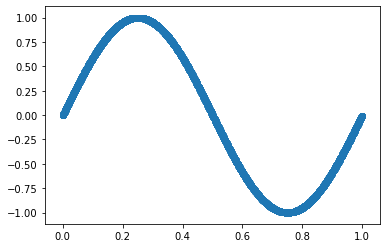

In [5]:
#%matplotlib inline
plt.scatter(pdata['x'],pdata['y'])

Split the dataset into training and testing sets

In [6]:
train_dataset = pdata.sample(frac=0.8, random_state=0)
test_dataset = pdata.drop(train_dataset.index)

train_dataset2 = pdata2.sample(frac=0.8, random_state=0)
test_dataset2 = pdata2.drop(train_dataset2.index)

Split features from labels

In [7]:
train_labels = train_dataset.pop('y')
test_labels = test_dataset.pop('y')

train_labels2 = train_dataset2.pop('y')
test_labels2 = test_dataset2.pop('y')

##### Create a model

In [8]:
def build_model():
    model = keras.Sequential([
        layers.Dense(100, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(100, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])
    return model

def build_model2():
    model = keras.Sequential([
        layers.Dense(neurons, activation='relu', input_shape=[len(train_dataset2.keys())]),
        layers.Dense(neurons, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])
    return model

In [9]:
model = build_model()
model2 = build_model2()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [10]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_4 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


#### Train the model

In [11]:
history = model2.fit(train_dataset2, train_labels2, validation_split=0.2, epochs=25)

Train on 3197 samples, validate on 800 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
3197/3197 [==============================] - 0s 147us/sample - loss: 0.0586 - acc: 3.1279e-04 - val_loss: 0.0062 - val_acc: 0.0000e+00
Epoch 2/25
3197/3197 [==============================] - 0s 75us/sample - loss: 0.0019 - acc: 3.1279e-04 - val_loss: 3.4667e-04 - val_acc: 0.0000e+00
Epoch 3/25
3197/3197 [==============================] - 0s 69us/sample - loss: 1.3332e-04 - acc: 3.1279e-04 - val_loss: 5.3515e-05 - val_acc: 0.0000e+00
Epoch 4/25
3197/3197 [==============================] - 0s 66us/sample - loss: 3.3465e-05 - acc: 3.1279e-04 - val_loss: 2.4135e-05 - val_acc: 0.0000e+00
Epoch 5/25
3197/3197 [==============================] - 0s 63us/sample - loss: 2.1282e-05 - acc: 3.1279e-04 - val_loss: 2.1616e-05 - val_acc: 0.0000e+00
Epoch 6/25
3197/3197 [==============================] - 0s 65us/sample - loss: 1.7493e-05 - acc: 3.1279e-04 - val_loss: 1.7764e-05 - val_acc: 0.0000e+0

Visualize the model's training progress via the history object

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,acc,val_loss,val_acc,epoch
20,0.000003,0.000313,0.000003,0.0,20
21,0.000003,0.000313,0.000003,0.0,21
22,0.000003,0.000313,0.000002,0.0,22
23,0.000002,0.000313,0.000002,0.0,23
24,0.000002,0.000313,0.000002,0.0,24


____

#### Plot the history

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

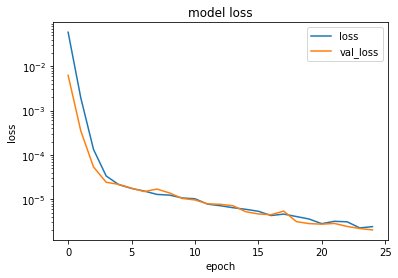

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

Are `10` epochs too few? If so, try training for more epochs.

In [14]:
test_predictions2 = model2.predict(test_dataset2).flatten()

### Make predictions

Finally, predict values using data in the test set:

Text(0.5, 0, 'True Values')

Text(0, 0.5, 'Predictions')

(-2, 2)

(-2, 2)

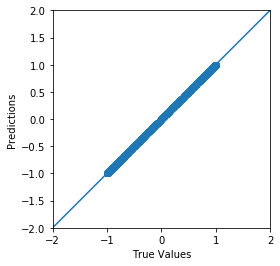

In [15]:
test_predictions2 = model2.predict(test_dataset2).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels2, test_predictions2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.xlim([-2,2])
plt.ylim([-2,2])
_ = plt.plot([-2,2], [-2,2])

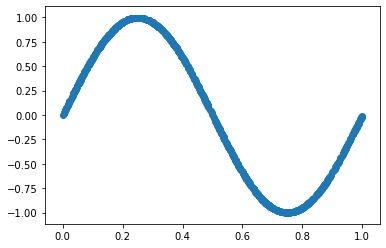

In [16]:
%matplotlib inline
plt.scatter(test_dataset2['x'],test_predictions2)

Take a look at the error distribution.

0.0010904485109596994


(array([224., 129., 103.,  71., 106.,  81., 104.,  37.,  27.,  25.,  19.,
         19.,  10.,  15.,  11.,   4.,   3.,   1.,   0.,   2.,   0.,   3.,
          2.,   0.,   3.]),
 array([8.19702996e-07, 2.48129699e-04, 4.95439695e-04, 7.42749691e-04,
        9.90059687e-04, 1.23736968e-03, 1.48467968e-03, 1.73198968e-03,
        1.97929967e-03, 2.22660967e-03, 2.47391966e-03, 2.72122966e-03,
        2.96853966e-03, 3.21584965e-03, 3.46315965e-03, 3.71046964e-03,
        3.95777964e-03, 4.20508964e-03, 4.45239963e-03, 4.69970963e-03,
        4.94701963e-03, 5.19432962e-03, 5.44163962e-03, 5.68894961e-03,
        5.93625961e-03, 6.18356961e-03]),
 <a list of 25 Patch objects>)

Text(0.5, 0, 'Prediction Error')

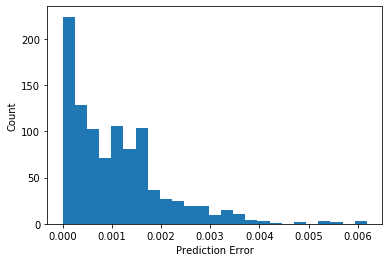

In [17]:
error = abs(test_predictions2 - test_labels2)
print(st.mean(error))
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

# Make predictions outside training range

In [18]:
nMax = 500

A_predict = 1
data = []
for x in np.arange(0,nMax):
    if x<nPast:
        y = A_predict*np.sin(float(x)*(2*np.pi)/T)
    else:
        y = 0
    xn = (x%(T))/(T)
    data.append([xn,x,y])
data = np.array(data)

# past = np.zeros((1, int(nPast)))
past = data[0:int(nPast),2]

test = pd.DataFrame([past], columns=np.arange(-nPast,0))
test.loc[:,'x'] = data[int(nPast),0]
test.loc[:,'y'] = data[int(nPast),2]

df1 = pd.DataFrame({'xn':data[:,0], 'x':data[:,1], 'y':data[:,2]})

for i in np.arange(0,int(nMax-nPast)):
    test.loc[i,'y'] = model2.predict(test.iloc[i:i+1,:].drop('y',axis=1))
    if i != int(nMax-nPast-1):
        test.loc[i+1,0:nPast-1] = test.iloc[i,:].shift(-1)
        test.loc[i+1,-1] = test.loc[i,'y']
        test.loc[i+1,'x'] = df1.loc[i+nPast+1,'xn']

0.04880951033099457


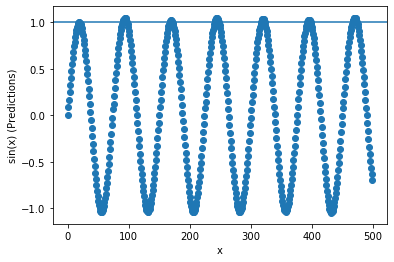

In [19]:
ynew = np.append(df1.loc[:nPast-1,'y'], test.loc[:,'y'])
error_mean = st.mean(abs(ynew - np.sin(df1['x']*(2*np.pi)/T)))
print(error_mean)

%matplotlib inline
plt.scatter(df1['x'],ynew);
#plt.scatter(df1['x'],np.sin(df1['x']*(2*np.pi)/T))
plt.axhline(A_predict);
plt.xlabel('x');
plt.ylabel('sin(x) (Predictions)');